In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt
import matplotlib.pyplot as plt

In [32]:
orange=pd.read_csv("Orange_Telecom_Churn_Data.csv")
orange.drop(columns=['state', 'account_length', 'phone_number'],inplace=True)
orange.intl_plan.replace({"no":0,"yes":1},inplace=True)
orange.voice_mail_plan.replace({"no":0,"yes":1},inplace=True)
#orange.keys()

In [53]:
print(orange.churned.value_counts(normalize=True))
x=orange.drop(columns="churned")
y=orange.churned

xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.3,random_state=50)
print(yTrain.value_counts(normalize=True))
print(yTest.value_counts(normalize=True))


False    0.8586
True     0.1414
Name: churned, dtype: float64
False    0.858857
True     0.141143
Name: churned, dtype: float64
False    0.858
True     0.142
Name: churned, dtype: float64


In [54]:
dtc=DecisionTreeClassifier()
dtc.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
ytrainpred=dtc.predict(xTrain)

ytestpred=dtc.predict(xTest)
print("Ac on train",accuracy_score(ytrainpred,yTrain))
print("Ac on test",accuracy_score(ytestpred,yTest))

Ac on train 1.0
Ac on test 0.912


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid={"max_depth":range(1,dtc.tree_.max_depth+1,2),"max_features":range(1,len(dtc.feature_importances_)+1)}
gr=GridSearchCV(estimator=DecisionTreeClassifier(random_state=50),param_grid=param_grid,scoring="accuracy",n_jobs=-1)

In [58]:
gr=gr.fit(xTrain,yTrain)

/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [59]:
print(gr.best_estimator_.max_depth)
print(gr.best_estimator_.max_features)

7
12


In [60]:
grpredtrain=gr.best_estimator_.predict(xTrain)
print("accuracy score ",accuracy_score(grpredtrain,yTrain))
grpredtest=gr.best_estimator_.predict(xTest)
print("accuracy score ",accuracy_score(grpredtest,yTest))

accuracy score  0.9702857142857143
accuracy score  0.9486666666666667


In [61]:
len(dtc.feature_importances_)

17

In [64]:
lr=LogisticRegressionCV()
lr.fit(xTrain,yTrain)

/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [73]:
predtrain=lr.predict(xTrain)
print("accuracy on train",accuracy_score(predtrain,yTrain))
predtest=lr.predict(xTest)
print("accuracy on test",accuracy_score(predtest,yTest))

accuracy on train 0.8662857142857143
accuracy on test 0.8613333333333333


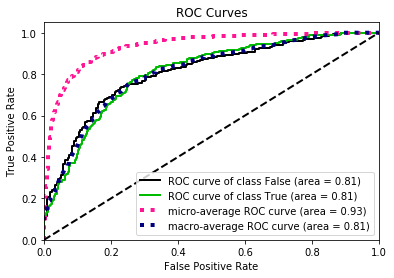

In [77]:
y_prob=lr.predict_proba(xTest)
skplt.metrics.plot_roc_curve(yTest,y_prob)